<a href="https://colab.research.google.com/github/SowmyaDontha88/Machine_Learning/blob/main/ANN_Churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# **Problem Statement -> Building customer churn model using Artifical Neural Network**

In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


# **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
corr = data.corr()

Finding the correlation between the varibales

<Axes: >

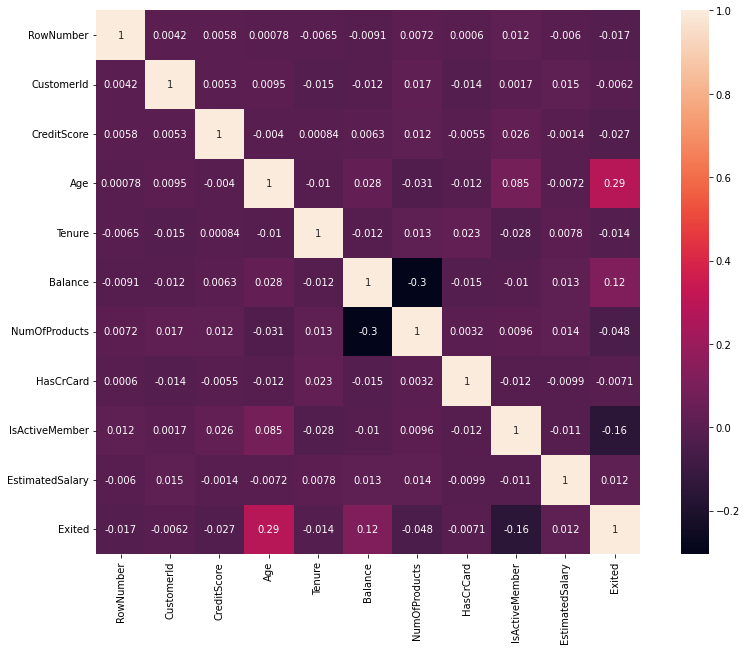

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,square=True)

In [ ]:
X = data.iloc[:, 3:-1].values

In [ ]:
Y = data.iloc[:, -1].values

Using Label encoder we convert the categorical values into possible 0 or 1.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The standard scaler is used to resize the distribution into smaller values sunch that the overall mean is zero and standard deviation is 1.

# **Building ANN model**

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
history = model.fit(X_train, Y_train, epochs=50,batch_size=10)

Epoch 1/50
700/700 [==============================] - 5s 3ms/step - loss: 0.4989 - accuracy: 0.7879
Epoch 2/50
700/700 [==============================] - 2s 2ms/step - loss: 0.4417 - accuracy: 0.8091
Epoch 3/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4287 - accuracy: 0.8163
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4205 - accuracy: 0.8196
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4144 - accuracy: 0.8244
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4109 - accuracy: 0.8243
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8243
Epoch 8/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8263
Epoch 9/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4036 - accuracy: 0.8244
Epoch 10/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8249

In [ ]:
scores = model.evaluate(X_train, Y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

219/219 [==============================] - 1s 3ms/step - loss: 0.3383 - accuracy: 0.8617
accuracy: 86.17%


Using the above ANN model, we get the accuracy of 86%

# **plotting results**

dict_keys(['loss', 'accuracy'])


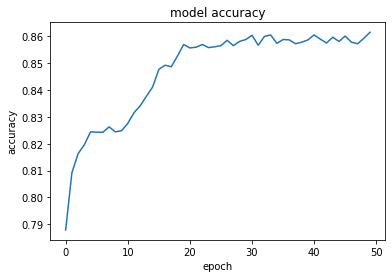

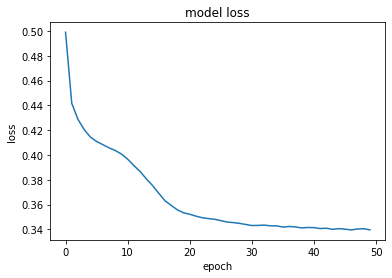

In [ ]:
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()